In [1]:
%matplotlib inline

from __future__ import print_function

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import os
import warnings

import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

import pycoco as pcc
import pyCoCo as pccsim

import lsst_tools as lsstt
from lcsim.simlib import SIMLIBReader
from lcsim.lcsim import LCSim

plotdir = os.path.join(os.environ['PYPLOTDIR'], 'SESNePaper/')

In [2]:
def setup_plot_defaults(font_size=14):
    """

    """

    plt.rcParams['ps.useafm'] = True
    plt.rcParams['pdf.use14corefonts'] = True
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.size'] = font_size
    plt.rcParams['figure.subplot.hspace'] = 0.1
    plt.rc('font', family='sans-serif')
    plt.rc('font', serif='Helvetica')
    pass


In [6]:
def plot_fig_3(sn, filtername = 'BessellB', legend = True, xminorticks = 5, mark_spectra = True,
            fit = True, enforce_zero = True, multiplot = True, yaxis_lim_multiplier = 1.1,
            lock_axis = False, xextent = False, filter_uncertainty = 10, yminorticks = 0.5,
            outfile = "Firth+17_fig3.png", xlim = False, plotdir = os.path.join(os.environ['PYPLOTDIR'], 'SESNePaper/'),
            show = True, save = True, scale = 1, 
            verbose = False, *args, **kwargs):
    """
    Scraped from plotlc
    Parameters
    ----------

    Returns
    -------
    """
    if hasattr(sn.phot, "data"):

        setup_plot_defaults()
        outpath = os.path.join(plotdir, outfile)
        
        fig = plt.figure(figsize=[12, 8])

        fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
                            right = 0.97, hspace=0, wspace = 0)
        
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(223)
        ax4 = fig.add_subplot(224)
        ## Label the axes
        xaxis_label_string = r'$\textnormal{Time, MJD (days)}$'
        yaxis_label_string = r'$\textnormal{Flux, } 10^{-15}\textnormal{ erg s}^{-1}\textnormal{\AA}^{-1}\textnormal{cm}^{-2}$'

        ## Panel 1

        ax1.errorbar(sn.phot.data[filtername]['MJD'], sn.phot.data[filtername]['flux']*scale,
                     yerr = sn.phot.data[filtername]['flux_err']*scale,
                     capsize = 0, fmt = 'o', color = sn.phot.data_filters[filtername]._plot_colour,
                     ecolor = pcc.hex['batman'],
                     markeredgecolor = pcc.hex['batman'], markeredgewidth = 1,
                     *args, **kwargs)
        
        ## Panel 2

        ax2.errorbar(sn.phot.data[filtername]['MJD'], sn.phot.data[filtername]['flux']*scale,
                     yerr = sn.phot.data[filtername]['flux_err']*scale,
                     capsize = 0, fmt = 'o', color = sn.phot.data_filters[filtername]._plot_colour,
                     ecolor = pcc.hex['batman'],
                     markeredgecolor = pcc.hex['batman'], markeredgewidth = 1,
                     *args, **kwargs)
        
        ax2.fill_between(sn.lcfit.data[filtername]['MJD'], sn.lcfit.data[filtername]['flux_upper'], sn.lcfit.data[filtername]['flux_lower'],
                 color = sn.phot.data_filters[filtername]._plot_colour,
                 alpha = 0.8, zorder = 0,
                 *args, **kwargs)
    
        ## Panel 3
   
        ax3.errorbar(sn.phot.data[filtername]['MJD'], sn.phot.data[filtername]['flux']*scale,
                     yerr = None,
                     capsize = 0, fmt = 'o', color = sn.phot.data_filters[filtername]._plot_colour,
                     ecolor = pcc.hex['batman'],
                     markeredgecolor = pcc.hex['batman'], markeredgewidth = 1, alpha=0.5,
                     *args, **kwargs)
        
        ax3.fill_between(sn.lcfit.data[filtername]['MJD'], sn.lcfit.data[filtername]['flux_upper'], sn.lcfit.data[filtername]['flux_lower'],
                 color = sn.phot.data_filters[filtername]._plot_colour,
                 alpha = 0.8, zorder = 0,
                 *args, **kwargs)

        ###
        
        if verbose: print(sn.spec)
        for spec_key in sn.spec:
            if verbose: print(spec_key)
            too_blue =  sn.phot.data_filters[filtername]._lower_edge < np.nanmin(sn.spec[spec_key].wavelength) - filter_uncertainty
            too_red = sn.phot.data_filters[filtername]._upper_edge > np.nanmax(sn.spec[spec_key].wavelength) + filter_uncertainty

            if not too_red and not too_blue:
                
                ax2.plot([sn.spec[spec_key].mjd_obs, sn.spec[spec_key].mjd_obs],
                         [0.0, np.nanmax(sn.phot.phot['flux'])*1.5],
                         ls = ':', color = pcc.hex['batman'], zorder = 0)
                
                ax3.plot([sn.spec[spec_key].mjd_obs, sn.spec[spec_key].mjd_obs],
                         [0.0, np.nanmax(sn.phot.phot['flux'])*1.5],
                         ls = ':', color = pcc.hex['batman'], zorder = 0)
                
                ax4.plot([sn.spec[spec_key].mjd_obs, sn.spec[spec_key].mjd_obs],
                         [0.0, np.nanmax(sn.phot.phot['flux'])*1.5],
                         ls = ':', color = pcc.hex['batman'], zorder = 0)                
                
        ###
               
        fltPath = b"/Users/berto/Code/CoCo/data/filters"
        rootPath = b"/Users/berto/Code/CoCo"

        coco = pccsim.pyCoCo(fltPath, rootPath)
        mjdmax_to_sim = pcc.get_mjdmax(sn, "BessellB") 
        mjdmax_v = pcc.get_mjdmax(sn, "BessellV") ## Specphase was done relative to V        
        print(mjdmax_to_sim, mjdmax_v, mjdmax_to_sim-mjdmax_v)
#         mjdmax_to_sim = 0

        path_to_filter = os.path.join(pcc._default_filter_dir_path,"BessellB.dat")  
        BessellB = pcc.FilterClass()
        BessellB.read_filter_file(path_to_filter)
        BessellB.calculate_AB_zp()

        lcs = LCSim()



        mjd_list = np.arange(0.,95,0.1)-30.
        mjd_list = mjd_list+mjdmax_to_sim
        mjd_to_sim = np.array([])
        filters_to_sim = []

        for mjd in mjd_list:
            filters_to_sim = np.append(filters_to_sim, lsstt.utils.b(BessellB.filter_name))
            mjd_to_sim = np.append(mjd_to_sim, mjd)
            
        info = pcc.InfoClass()
        info.load()
        z_sim = info.get_sn_info("SN1998bw")["z_distmod"]
        z_obs = info.get_sn_info("SN1998bw")["z_obs"]
        z_to_sim = z_sim[0]
#         z_to_sim=0.01
        z_cmap = [0.0]
        time_dilation = 1.+z_to_sim

        flux, flux_err = coco.simulate(b"SN1998bw",
                                       z_to_sim, 0.0, 0.0, 0.0, 3.1,
                                       mjdmax_to_sim, mjd_to_sim,
                                       filters_to_sim)
        
#         flux, flux_err = coco.simulate_set_params(b"SN1998bw",
#                                        z_to_sim, 0.0, 0.0, 0.0, 3.1,
#                                        mjdmax_to_sim, mjd_to_sim,
#                                        filters_to_sim, params)

        specphot = coco.spec_photometry(b"SN1998bw", 
                     z_to_sim, b"BessellB")

        sp = pcc.PhotometryClass()
        sp.load_table(pcc.utils.specphot_out_to_ap_table(specphot, mjdmax_to_sim, "BessellB"))
        
        spec_mjd = [sn.spec[spec].mjd_obs for spec in sn.spec]
        for i,s in enumerate(spec_mjd):
            print((((sp.data["BessellB"]["MJD"][i]-mjdmax_to_sim)/((1+z_obs)/(1.-z_sim)))+mjdmax_v)[0],spec_mjd[i]) 
            
#         sp.load_table(pcc.utils.specphot_out_to_ap_table(specphot, mjdmax_v, "BessellB")) ## SPECPHASE done wrt BessellV

    ### 
#         ax3.errorbar(sp.phot["MJD"], sp.phot["flux"], yerr=None, color = pcc.hex["BessellB"],
#             label = None, ecolor = pcc.hex['batman'], mec = pcc.hex["batman"], fmt="o", capsize=0)

## Panel 4      
#         ax4.errorbar(sn.simplespecphot.data[filtername]['MJD'], sn.simplespecphot.data[filtername]['flux'],
#              yerr = sn.simplespecphot.data[filtername]['flux_err'],
#              capsize = 0, fmt = 'o', color = pcc.hex["batman"],
#              ecolor = pcc.hex['batman'], mec = pcc.hex["batman"], label = r"$\textnormal{SpecPhot}$",
#              *args, **kwargs)
        
#         ax4.errorbar(sp.phot["MJD"], sp.phot["flux"], yerr=None, color = pcc.hex["BessellB"],
#             label = None, ecolor = pcc.hex['batman'], mec = pcc.hex["batman"], fmt="o", capsize=0)

#         ax4.errorbar(((sp.phot["MJD"]-mjdmax_to_sim)*time_dilation)+mjdmax_to_sim, sp.phot["flux"], errorbar=None, color = pcc.hex["BessellB"],
#             label = None, ecolor = pcc.hex['batman'], mec = pcc.hex["batman"], fmt="o", capsize=0)

        ###
        
        axlist=[ax1, ax2, ax3, ax4]
        for ax in axlist:
            ax.set_xlim(50915, 51010)
            ax.set_ylim(0, 1.6e-14)
            
    plt.draw()

    if save:
        plt.savefig(outpath, format = 'png', dpi=300)
        fig.savefig(outpath.replace('png', 'pdf'), format = 'pdf', dpi=500)

    if show:
        plt.show()
    else:
        plt.close(fig)
#     pass
    return sn, sp


def make_fig3(*args, **kwargs):
#     snname = "SN2009jf"
    snname = "SN1998bw"
    
    sn = pcc.SNClass(snname)
    print(sn.name)
    sn.load_phot(verbose = False)

    sn.load_list("/Users/berto/Code/CoCo/lists/"+snname+".list")
    sn.load_spec()
    sn.get_lcfit("/Users/berto/Code/CoCo/recon/"+snname+".dat")
    
    sn.check_overlaps()
    sn.load_mangledspec()
    sn.get_simplespecphot()
    
    sn.phot.data_filters["BessellB"]._plot_colour = pcc.hex["BessellB"]
    
    xlim = [55115, 55132]
    yaxis_lim_multiplier = 1.13
#     plot_fig_3(sn,*args, **kwargs)

    sn, sp = plot_fig_3(sn,*args, **kwargs)
    
#     pass
    return sn, sp


SN1998bw


/Users/berto/Code/verbose-enigma/pycoco/classes.py:220: UserWarning: WARNING: You passed something that was <class 'numpy.str_'>This might go wrong.
  StringWarning(filename)


[ 50943.22499996] [ 50944.82199995] [-1.59699999]
50936.0432601 50936.07
50937.0089162 50937.06
50939.9156526 50940.04
50940.8813185 50941.03
50941.8469844 50942.02
50943.7880549 50944.01
50945.7193828 50945.99
50946.6850428 50946.98
50948.6163648 50948.96
50951.5231111 50951.94
50953.4544331 50953.92
50954.4200891 50954.91
50955.3857354 50955.9
50961.1895089 50961.85
50964.096265 50964.83
50970.8656454 50971.77
50986.345457 50987.64
50993.1148374 50994.58


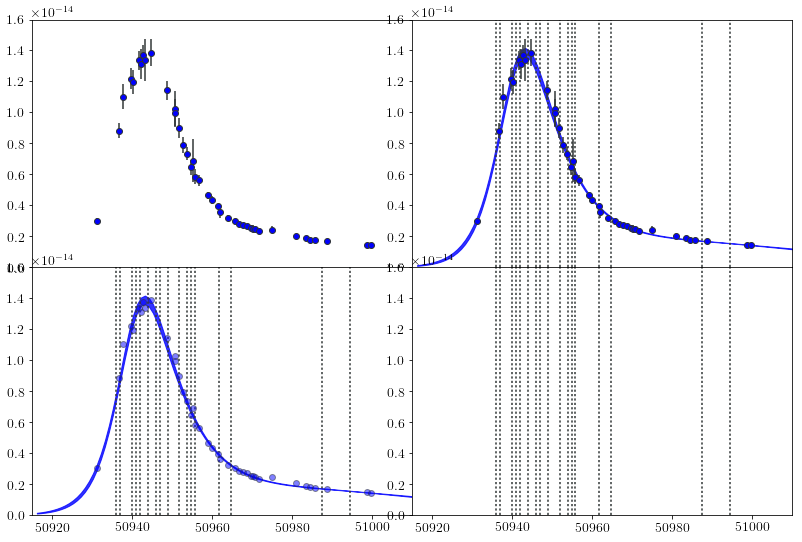

In [7]:
sn, sp = make_fig3(multiplot=False)

In [9]:
info = pcc.InfoClass()
info.load()
z_sim = info.get_sn_info("SN1998bw")["z_distmod"]
z_obs = info.get_sn_info("SN1998bw")["z_obs"]

spec_mjd = [sn.spec[spec].mjd_obs for spec in sn.spec]

mjdmax_to_sim = pcc.get_mjdmax(sn, "BessellB") 
mjdmax_v = pcc.get_mjdmax(sn, "BessellV") ## Specphase was done relative to V     

for i,s in enumerate(spec_mjd):
    print((((sp.data["BessellB"]["MJD"][i]-mjdmax_to_sim)/((1+z_obs)/(1.-z_sim)))+mjdmax_v)[0],spec_mjd[i]) 

50936.0432601 50936.07
50937.0089162 50937.06
50939.9156526 50940.04
50940.8813185 50941.03
50941.8469844 50942.02
50943.7880549 50944.01
50945.7193828 50945.99
50946.6850428 50946.98
50948.6163648 50948.96
50951.5231111 50951.94
50953.4544331 50953.92
50954.4200891 50954.91
50955.3857354 50955.9
50961.1895089 50961.85
50964.096265 50964.83
50970.8656454 50971.77
50986.345457 50987.64
50993.1148374 50994.58


In [10]:
sp.data

OrderedDict([('BessellB', <Table length=18>
                  MJD             flux       flux_err  filter 
                float64         float64      float64    str8  
              ------------ ----------------- -------- --------
               50934.30086 8.03779587621e-15      0.0 BessellB
               50935.28251 9.31655076422e-15      0.0 BessellB
               50938.23739 1.28151623234e-14      0.0 BessellB
               50939.21905 1.35823160246e-14      0.0 BessellB
               50940.20071 1.40294432417e-14      0.0 BessellB
               50942.17393 1.39996971375e-14      0.0 BessellB
              50944.137246 1.30050264764e-14      0.0 BessellB
                50945.1189 1.22976277594e-14      0.0 BessellB
               50947.08221 1.06898649956e-14      0.0 BessellB
                50950.0371 8.39290004661e-15      0.0 BessellB
               50952.00041  7.0902510237e-15      0.0 BessellB
               50952.98206 6.52077238468e-15      0.0 BessellB
           

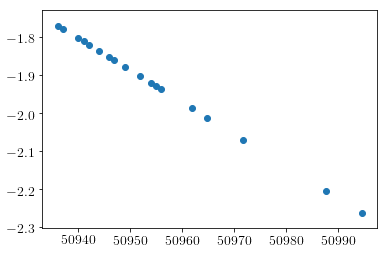

In [11]:
plt.scatter(spec_mjd, sp.data["BessellB"]["MJD"]-spec_mjd)

In [12]:
print((mjdmax_to_sim- mjdmax_v)*(1.+z_sim[0])/(1.-z_obs[0]))

[-1.62346588]
